<a href="https://colab.research.google.com/github/NickitaBogomolov/LAB_1_econometric/blob/main/Lab_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Лабораторная работа № 1: Парный регрессионный анализ
На основе статистических данных сформулировать постановку
задачи. Для поставленной задачи требуется:
1. Найти корреляционную зависимость между фактором (х) и
результирующим признаком (у). Найти параметры уравнения линейной
регрессии, дать экономическую интерпретацию коэффициента регрессии.
2. На одном графике построить исходные данные и теоретическую прямую,
то есть построить поле корреляции.
3. Найти коэффициент вариации.
4. Найти коэффициент корреляции.
5. Найти коэффициент детерминации.
6. Оценить качество уравнения с помощью средней ошибки аппроксимации.
7. Представить схему дисперсионного анализа.
8. Оценить статистическую надежность результатов регрессионного
моделирования с помощью F–критерия Фишера (α=0,05).
9. Оценить статистическую значимость коэффициентов регрессии и
корреляции по t–критерию Стьюдента (α=0,05).
10. Найти 95% доверительные интервалы для статистически значимых
параметров модели.
11. Рассчитать прогнозное значение результата, если прогнозное значение
фактора увеличится на 5% от его среднего уровня. Определить доверительный
интервал прогноза для уровня значимости α=0,05.
12. Найти доверительный интервал для индивидуальных значений зависимой
переменной.
13. Дать с помощью среднего коэффициента эластичности сравнительную
оценку силы связи фактора с результатом.
14. Проверить выполнение предпосылок МНК (условия Гаусса–Маркова):
  1. Случайный характер остатков (критерий поворотных точек);
  2.∑ 𝑒𝑖 = 0
𝑛
𝑖=1
;
  3.Гомоскедастичность (тест Спирмена, тест Голдфельда–Квандта);
  4.Отсутствие автокорреляции остатков (критерий Дарбина–Уотсона);
  5.Нормальный закон распределения остатков (проверить с помощью
построения гистограммы и RS–критерия)
15. По этим же данным построить нелинейные регрессионные модели,
составить сводную таблицу и провести сравнительный анализ. Сделать вывод о
модели, наилучшим образом аппроксимирующей исходные данные.
Не забудьте дать экономическую интерпретацию полученных результатов!



https://drive.google.com/file/d/1OPri5brfbE1Fahb-K_C0NCXEFYQnoCz6/view?usp=drive_link  --Ссылка на dataset

In [ ]:
! gdown --id 1OPri5brfbE1Fahb-K_C0NCXEFYQnoCz6

/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1OPri5brfbE1Fahb-K_C0NCXEFYQnoCz6
To: /content/Salary_Data[1].csv
100% 348k/348k [00:00<00:00, 5.17MB/s]


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.api import anova_lm
from scipy import stats

df = pd.read_csv('/content/Salary_Data[1].csv')
df

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
6699,49.0,Female,PhD,Director of Marketing,20.0,200000.0
6700,32.0,Male,High School,Sales Associate,3.0,50000.0
6701,30.0,Female,Bachelor's Degree,Financial Manager,4.0,55000.0
6702,46.0,Male,Master's Degree,Marketing Manager,14.0,140000.0


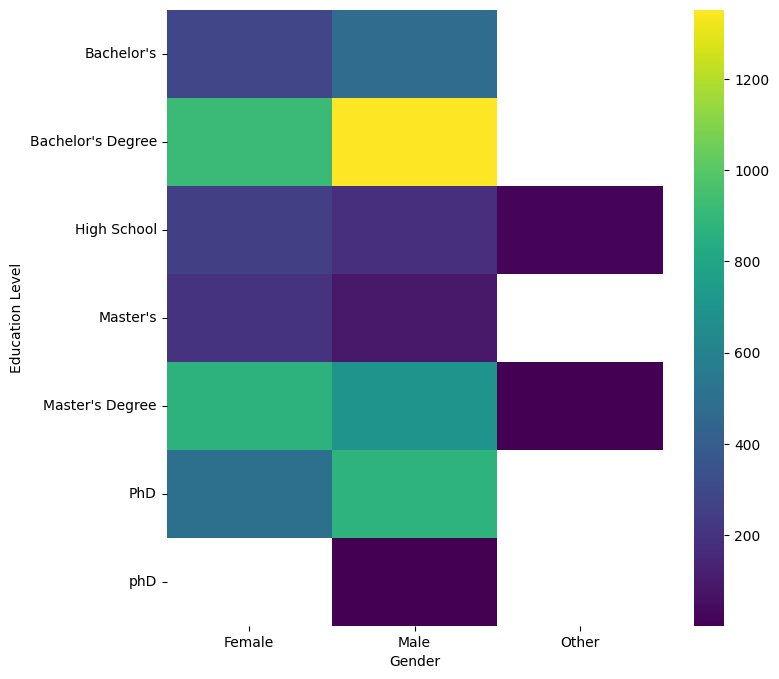

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Education Level'].value_counts()
    for x_label, grp in df.groupby('Gender')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Gender')
_ = plt.ylabel('Education Level')

In [ ]:
!pip install pandas
!pip install numpy
!pip install scipy
!pip install matplotlib
!pip install scikit-learn

In [ ]:
!pip install statsmodels

pandas: Используется для работы с данными в виде таблиц (DataFrame).

numpy: Используется для математических операций и работы с массивами.

matplotlib.pyplot: Используется для построения графиков.

statsmodels.api: Используется для построения регрессионных моделей и статистического анализа.

scipy.stats: Используется для статистических тестов.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.api import anova_lm
from scipy import stats

# данные по экспорту за 2022-2024 года в РФ в млн.$ с сайта ЦБ
"""data = {
    'Дата': ['2022.01.01', '2022.02.01', '2022.03.01', '2022.04.01', '2022.05.01', '2022.06.01', '2022.07.01', '2022.08.01', '2022.09.01', '2022.10.01', '2022.11.01', '2022.12.01', '2023.01.01', '2023.02.01', '2023.03.01', '2023.04.01', '2023.05.01', '2023.06.01', '2023.07.01', '2023.08.01', '2023.09.01', '2023.10.01', '2023.11.01', '2023.12.01', '2024.01.01', '2024.02.01', '2024.03.01', '2024.04.01', '2024.05.01', '2024.06.01', '2024.07.01', '2024.08.01', '2024.09.01', '2024.10.01', '2024.11.01', '2024.12.01'],
    'Курс_рубля': [65.81, 60.85, 61.12, 59.82, 60.42, 58.22, 57.18, 63.31, 77.9, 103.47, 77.17, 76.59, 88.58, 90.41, 97.12, 96.62, 95.29, 90.47, 83.32, 79.21, 81, 76.1, 72.78, 68.88, 88.6803, 91.5183, 91.7396, 92.9586, 90.6072, 87.7569, 87.4917, 89.1602, 91.2345, 96.1602, 100.6875, 102.2596],
    'Объем_экспорта': [24087, 27076, 18598, 16700, 18861, 21181, 21658, 23504, 23661, 25179, 26272, 29734, 24089, 22520, 27967, 24776, 26914, 25424, 25463, 25426, 24820, 23398, 24274, 27795, 21404, 22794, 22736, 22287, 24534, 23886, 25343, 25568, 26770, 27561, 25938, 25715]
}"""

#df = pd.DataFrame(data)
#df
df = pd.read_csv('/content/Salary_Data[1].csv')
# dropna() убирает пустые значения
df = df[['Years of Experience', 'Salary']].copy().dropna()
df

,Years of Experience,Salary
0,5.0,90000.0
1,3.0,65000.0
2,15.0,150000.0
3,7.0,60000.0
4,20.0,200000.0
...,...,...
6699,20.0,200000.0
6700,3.0,50000.0
6701,4.0,55000.0
6702,14.0,140000.0


X: Независимая переменная

y: Зависимая переменная

sm.add_constant(X): Добавляет константу (intercept) в модель.

sm.OLS(y, X): Создает модель обычного метода наименьших квадратов (OLS).

model.fit(): Обучает модель на данных.

model.summary(): Выводит сводку по модели, включая коэффициенты, статистику и т.д.


In [ ]:


# 1. Найти корреляционную зависимость и параметры уравнения линейной регрессии

x = df['Years of Experience']
y = df['Salary']
x = sm.add_constant(x)  # Добавляем константу для intercept
model = sm.OLS(y, x).fit()
print(model.summary())

# Экономическая интерпретация коэффициента регрессии
print(f"Коэффициент регрессии (наклон): {model.params[1]}")

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.654
Model:                            OLS   Adj. R-squared:                  0.654
Method:                 Least Squares   F-statistic:                 1.268e+04
Date:                Mon, 03 Mar 2025   Prob (F-statistic):               0.00
Time:                        16:35:55   Log-Likelihood:                -78791.
No. Observations:                6699   AIC:                         1.576e+05
Df Residuals:                    6697   BIC:                         1.576e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                5.828e+04    

<ipython-input-10-f4a2a1fac992>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Коэффициент регрессии (наклон): {model.params[1]}")


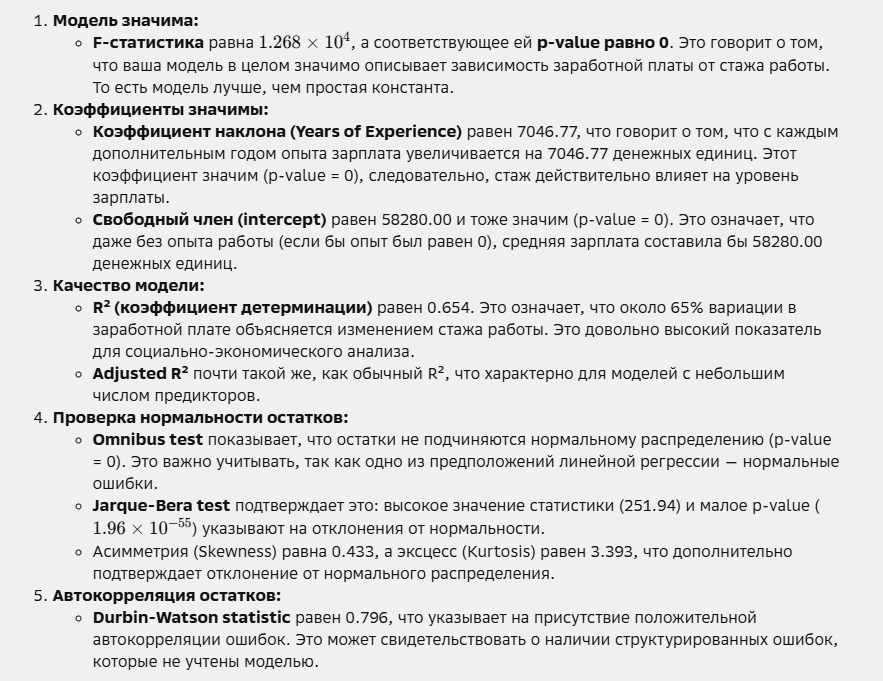

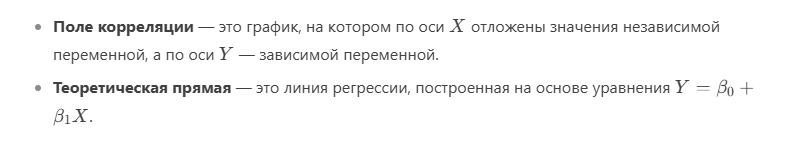

plt.scatter: Строит точечный график исходных данных.

plt.plot: Строит теоретическую прямую регрессии.

plt.xlabel и plt.ylabel: Подписывают оси.

plt.legend: Добавляет легенду.

plt.show: Отображает график.

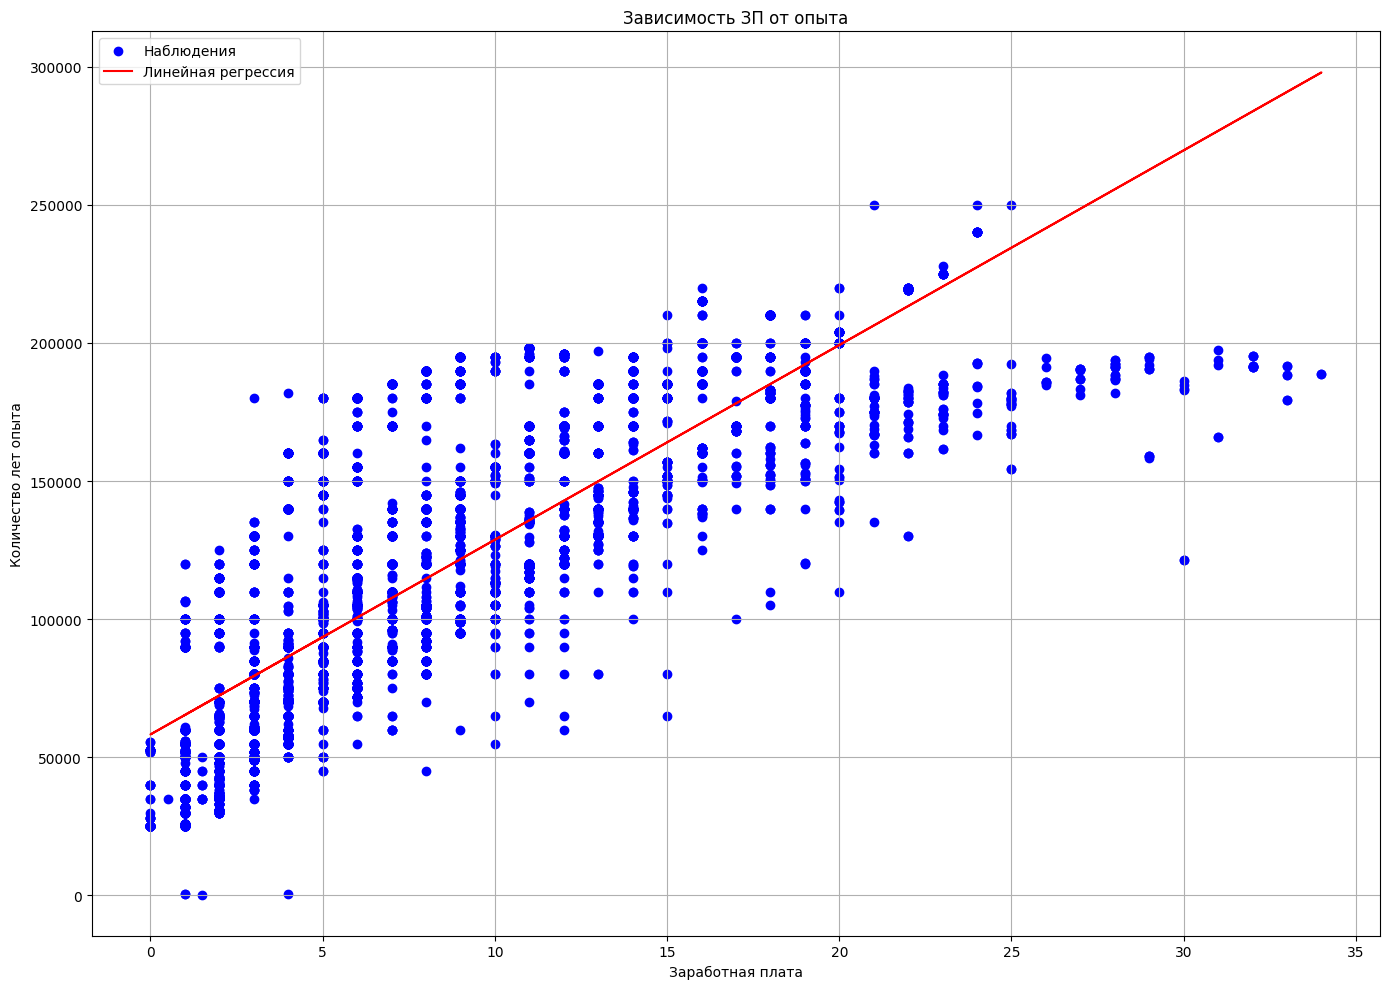

In [ ]:

# 2. Построить поле корреляции и теоретическую прямую
plt.figure(figsize=(14, 10))
plt.scatter(x.iloc[:, 1], y, color='blue', label='Наблюдения')  # x.iloc[:, 1]
plt.plot(x.iloc[:, 1], model.predict(X), color='red', label='Линейная регрессия')
plt.xlabel('Заработная плата')
plt.ylabel('Количество лет опыта')
plt.title('Зависимость ЗП от опыта')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:

# 3. Найти коэффициент вариации
cv = (np.std(y) / np.mean(y)) * 100
print(f"Коэффициент вариации: {cv}%")

Коэффициент вариации: 45.76747858839199%


np.std(y) — вычисляет стандартное отклонение для массива y.
np.mean(y) — вычисляет среднее значение для массива y.
Далее эти два значения делятся друг на друга, чтобы найти отношение стандартного отклонения к среднему.
Полученный результат умножается на 100, чтобы выразить его в процентах.
Результат печатается в формате строки с указанием знака процента %.
Коэффициент вариации (CV) — это статистическая мера относительного разброса выборки. Он рассчитывается как отношение стандартного отклонения к среднему значению, умноженное на 100%, чтобы получить процентное выражение
стандартное отклонение составляет примерно 45.76% от среднего значения выборки. Если перевести это в слова, можно сказать, что значения в выборке варьируются примерно на 46% относительно своего среднего значения.
Интерпретация CV зависит от контекста. Например:

Низкий CV (менее 10%) — означает, что данные достаточно однородны и стабильны.
Средний CV (10–30%) — говорит о некотором уровне разброса, но всё ещё приемлемом.
Высокий CV (более 30%) — сигнализирует о значительной вариабельности данных, что может указывать на неравномерность выборки или сильные колебания внутри неё.


In [ ]:

# 4. Найти коэффициент корреляции
corr_coef = np.corrcoef(df['Years of Experience'], df['Salary'])[0, 1]
print(f"Коэффициент корреляции: {corr_coef}")

Коэффициент корреляции: 0.8089689398558264


Коэффициент корреляции Пирсона — это статистическая мера, которая определяет степень линейной взаимосвязи между двумя переменными. Он принимает значения от

−1 до

1, где:


1 обозначает идеальную прямую положительную корреляцию,
−

−1 обозначает идеальную прямую отрицательную корреляцию,

0 указывает на отсутствие линейной корреляции.





df['Years of Experience'] и df['Salary'] — это два столбца в вашем датафрейме df, которые содержат значения для переменных "Years of Experience" (лет опыта) и "Salary" (заработок).
np.corrcoef() — это функция из библиотеки NumPy, которая вычисляет коэффициент корреляции Пирсона. Она возвращает матрицу корреляций размером
2
×
2
2×2, где:
Первый элемент `[0, 0]
—этокорреляцияпервойпеременнойссамойсобой
(
онавсегдаравна
—этокорреляцияпервойпеременнойссамойсобой(онавсегдаравна1$),
Элемент `[0, 1]$ — это корреляция между первой и второй переменной (в данном случае, между годами опыта и зарплатой),
Элементы
[
1
,
0
]
[1,0] и
[
1
,
1
]
[1,1] симметричны предыдущим двум, так как корреляционная матрица симметричная.
Выводится коэффициент корреляции между годами опыта и зарплатой, используя индекс [0, 1].






Коэффициент корреляции: 0.809
Это означает, что между годами опыта и уровнем зарплаты существует сильная прямая корреляция. Это интуитивно понятно: чем больше лет опыта у сотрудника, тем выше его заработок. Коэффициент близок к единице, что указывает на сильную линейную зависимость между этими двумя переменными.

In [ ]:

# 5. Найти коэффициент детерминации
r_squared = model.rsquared
print(f"Коэффициент детерминации (R^2): {r_squared}")

Коэффициент детерминации (R^2): 0.6544307456514594


Коэффициент детерминации — это доля дисперсии целевой переменной, которую можно объяснить моделью. Другими словами, этот показатель показывает, какую долю изменений в целевом значении можно предсказать, используя независимые переменные в модели.

Значение между 0 и 1: Чем ближе
R
2
R
2
  к 1, тем лучше модель объясняет данные. Значение 1 означает, что модель идеально предсказывает все изменения в целевой переменной.
Значение 0: Это значит, что модель совсем не способна объяснить изменение целевой переменной. То есть модель не имеет никакой предсказательной силы.
В данном случае, коэффициент детерминации равен 0.654. Это довольно хороший результат, показывающий, что примерно 65% вариации целевой переменной объясняется вашей моделью. Остальная часть (35%) связана с ошибкой модели или факторами, которые модель не учитывает.

model.rsquared — возвращает коэффициент детерминации
R
2
R
2
 . Это встроенный метод многих моделей машинного обучения, особенно линейной регрессии.
print() — выводит значение
R
2
R
2
 , округленное до 15 знаков после запятой.


In [ ]:

# 6. Оценить качество уравнения с помощью средней ошибки аппроксимации
y_pred = model.predict(x)
mape = np.mean(np.abs((y - y_pred) / y)) * 100
print(f"Средняя ошибка аппроксимации (MAPE): {mape}%")

Средняя ошибка аппроксимации (MAPE): 37.66800733929665%


средней абсолютной процентной ошибки (Mean Absolute Percentage Error, MAPE). Эта метрика позволяет оценить точность прогнозирования модели, выраженную в процентах от фактического значени
Вычисляется разность между предсказанными (y_pred) и истинными (y) значениями.
Разница делится на истинное значение, чтобы получить относительную ошибку.
Модуль этой разницы усредняется по всей выборке.
Результат умножается на 100%, чтобы выразить итоговую метрику в процентах.


MAPE измеряет среднюю величину отклонения предсказанных значений от реальных в процентах. Чем меньше значение MAPE, тем точнее модель.
Полученная средняя ошибка аппроксимации составляет 37.67%, что означает, что в среднем модель отклоняется от истинных значений на 37.67%.


Среднее отклонение в 37.67% является значительным, что говорит о том, что модель недостаточно точно предсказывает значения. В зависимости от области применения такой уровень точности может быть приемлемым или неудовлетворительным. Например, для финансовых прогнозов такая погрешность будет большой, тогда как для некоторых технических задач она может считаться допустимой.

In [ ]:

# 7. Представить схему дисперсионного анализа
# Сумма квадратов регрессии (SSR)
ssr = np.sum((model.predict(x) - np.mean(y)) ** 2)

# Сумма квадратов остатков (SSE)
sse = np.sum((y - model.predict(x)) ** 2)

# Общая сумма квадратов (SST)
sst = np.sum((y - np.mean(y)) ** 2)

# Степени свободы
df_reg = model.df_model  # Степени свободы регрессии
df_resid = model.df_resid  # Степени свободы остатков

# Средние квадраты
msr = ssr / df_reg
mse = sse / df_resid

# F-статистика
f_statistic = msr / mse

# p-значение
from scipy.stats import f
p_value = 1 - f.cdf(f_statistic, df_reg, df_resid)

# Создаем таблицу ANOVA
anova_table = pd.DataFrame({
    'Source': ['Regression', 'Residual', 'Total'],
    'SS': [ssr, sse, sst],
    'df': [df_reg, df_resid, df_reg + df_resid],
    'MS': [msr, mse, np.nan],
    'F': [f_statistic, np.nan, np.nan],
    'p-value': [p_value, np.nan, np.nan]
})

print(anova_table)

       Source            SS      df            MS            F       p-value
0  Regression  1.221376e+13     1.0  1.221376e+13  12682.61759  1.110223e-16
1    Residual  6.449422e+12  6697.0  9.630315e+08          NaN           NaN
2       Total  1.866318e+13  6698.0           NaN          NaN           NaN


Этот фрагмент кода реализует проведение дисперсионного анализа (ANOVA). Дисперсионный анализ помогает определить значимость вклада факторов в общую вариативность наблюдаемых данных, в частности, в контексте регрессионных моделей.

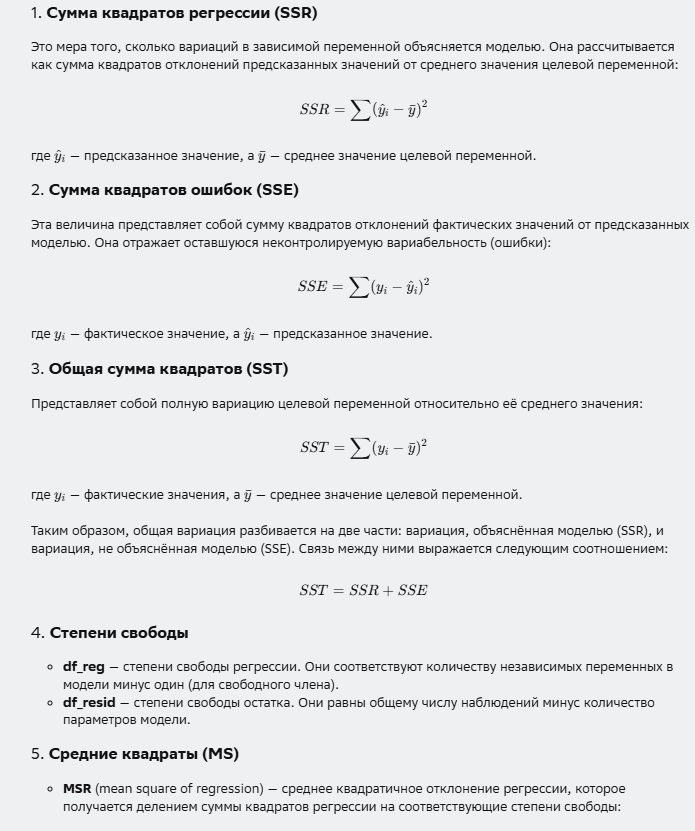 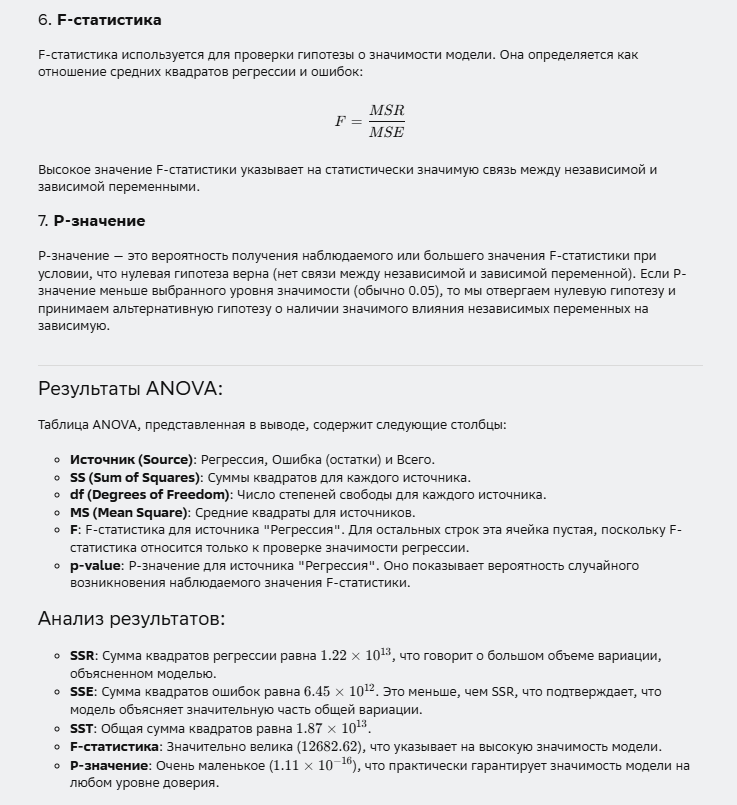
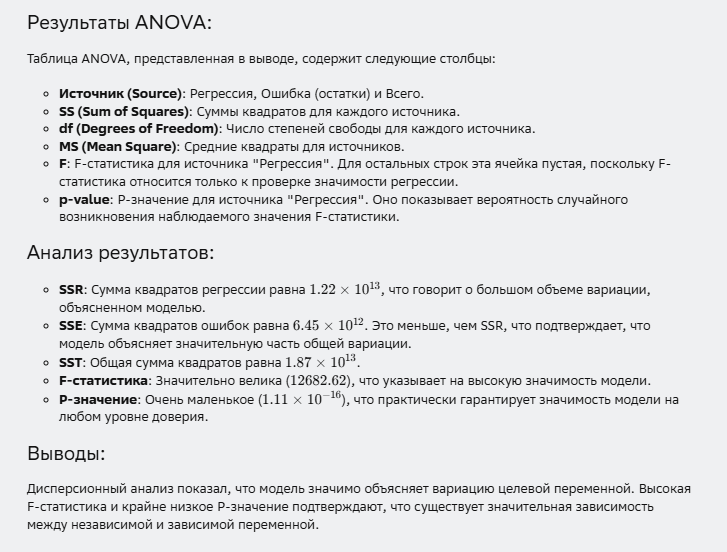

In [ ]:

# 8. Оценить статистическую надежность результатов регрессионного моделирования с помощью F–критерия Фишера
f_statistic = model.fvalue
f_critical = stats.f.ppf(1 - 0.05, model.df_model, model.df_resid)
print(f"F-статистика: {f_statistic}, F-критическое: {f_critical}")

F-статистика: 12682.617589605981, F-критическое: 3.8428477448852214


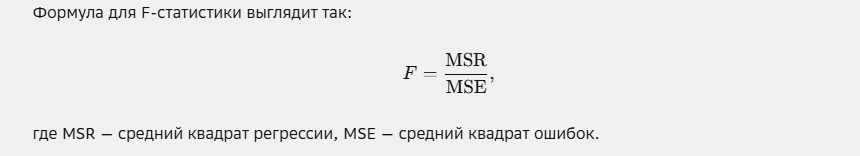

Оценка статистической надежности результатов регрессионного моделирования с помощью F-критерия Фишера заключается в сравнении F-статистики модели с критическим значением распределения Фишера. Давайте разберёмся подробнее.

F-статистика — это отношение двух дисперсий: дисперсии, обусловленной моделью (регрессией), и дисперсии, связанной с ошибками (остаточными отклонениями). Она служит показателем того, насколько успешно модель объясняет вариацию в данных.


Анализ результатов
В вашем примере F-статистика значительно превышает критическое значение (12682.618 против 3.843). Это говорит о том, что ваша модель является значимой на уровне 95%-го доверительного интервала. Таким образом, модель действительно обладает способностью предсказывать вариацию в данных.


Заключение
Использование F-критерия Фишера подтвердило, что ваше регрессионное моделирование обладает высокой статистической надежностью. Модель эффективно объясняет большую часть вариации в ваших данных.

In [ ]:

# 9. Оценить статистическую значимость коэффициентов регрессии и корреляции по t–критерию Стьюдента
t_values = model.tvalues
p_values = model.pvalues
print(f"t-значения: {t_values}")
print(f"p-значения: {p_values}")

t-значения: const                   92.116217
Years of Experience    112.617128
dtype: float64
p-значения: const                  0.0
Years of Experience    0.0
dtype: float64


T-значение (или t-статистика) вычисляется для каждого коэффициента регрессии. Оно показывает, насколько велико различие между оцененным коэффициентом и его предполагаемой нулевой величиной (нулевая гипотеза).

P-значение (вероятностное значение) связано с t-значением и определяет вероятность того, что наблюдаемый эффект мог бы произойти случайно, даже если истинное значение коэффициента равно нулю. P-значение вычисляется исходя из t-статистики и степеней свободы модели. Чем ниже p-значение, тем более значимым является соответствующий коэффициент.


T-значения:
Константа: T-значение равно 92.116. Это чрезвычайно высокое значение, указывающее на то, что константа в модели сильно отличается от нуля.
Years of Experience: T-значение равно 112.617. Это тоже очень большое число, говорящее о том, что коэффициент для переменной "Years of Experience" также значительно отличается от нуля.
P-значения:
Оба p-значения равны 0.0. Это означает, что вероятность того, что эти коэффициенты могли бы оказаться такими большими случайно, крайне мала. Обычно принято считать, что p-значение менее 0.05 уже указывает на статистическую значимость. В данном случае p-значения настолько близки к нулю, что это однозначно подтверждает значимость обоих коэффициентов.
Интерпретация:
Константа: Значительное положительное значение константы говорит о том, что даже когда "Years of Experience" равно нулю, зависимая переменная (скорее всего, зарплата или другой связанный параметр) принимает некоторое ненулевое значение.
Years of Experience: Большое положительное значение коэффициента для этой переменной указывает на то, что с увеличением опыта (в годах) существенно увеличивается и значение зависимой переменной. То есть опыт оказывает сильное положительное влияние на прогнозируемую величину.
Вывод:
Оба коэффициента имеют высокий уровень статистической значимости. Константа и переменная "Years of Experience" вносят значительный вклад в модель, и их включение оправдано.

In [ ]:

# 10. Найти 95% доверительные интервалы для статистически значимых параметров модели
conf_int = model.conf_int(alpha=0.05)
print(f"95% доверительные интервалы: {conf_int}")

95% доверительные интервалы:                                 0             1
const                57042.953111  59523.597077
Years of Experience   6924.105753   7169.430935


Константа:
Нижняя граница: 57,042.95
Верхняя граница: 59,523.60
Это означает, что с вероятностью 95% истинное значение константы лежит в диапазоне от 57,043 до 59,524. Поскольку константа в регрессионной модели обычно представляет собой базовый уровень эффекта, когда все остальные параметры равны нулю, полученный интервал говорит нам, что базовая оценка (при отсутствии лет опыта) колеблется вокруг этих значений.

Years of Experience:
Нижняя граница: 6,924.11
Верхняя граница: 7,169.43
Этот интервал показывает, что с вероятностью 95% увеличение одного года опыта приводит к увеличению зависимой переменной (возможно, зарплаты) на величину от 6,924 до 7,170 единиц. Этот диапазон весьма узкий, что говорит о высокой точности оценки влияния переменной "Years of Experience" на зависимую переменную.

Важные замечания:
Точность модели: Узость доверительных интервалов (особенно для переменной "Years of Experience") говорит о высокой точности модели в оценке влияния этой переменной.
Практическое применение: Можно использовать эти интервалы для прогнозирования значений зависимой переменной с учетом неопределенности. Например, при увеличении опыта на 1 год можно ожидать прирост в диапазоне от 6,924 до 7,170 единиц.
Вывод:
Доверительные интервалы показывают высокую степень уверенности в оценках параметров модели. Особенно это касается переменной "Years of Experience", где разница между нижней и верхней границами невелика, что делает модель надежной для прогнозирования.

In [ ]:


# 11. Рассчитать прогнозное значение результата, если прогнозное значение фактора увеличится на 5% от его среднего уровня
mean_x = np.mean(df['Years of Experience'])  # Среднее значение курса рубля
new_x = mean_x * 1.05  # Увеличиваем на 5%
# Формируем массив вручную: [константа, новое значение курса рубля]
new_X = np.array([[1, new_x]])  # Константа (1) и новое значение курса рубля

# Прогнозируем значение
y_forecast = model.predict(new_X)
print(f"Прогнозное значение ЗП при увеличении опыта на 5%: {y_forecast[0]}")

Прогнозное значение ЗП при увеличении опыта на 5%: 118179.14925469531


Интерпретация результата:
Прогнозное значение заработной платы при увеличении количества лет опыта на 5% составило 118,179.15. Это значение получено на основе текущего состояния модели и предположения о том, что фактор "лет опыта" увеличился на 5% от своего среднего значения.

Возможные улучшения:
Проверка исходных данных: Убедитесь, что исходные данные (значения фактора и зависимой переменной) корректны и репрезентативны.
Оптимизация модели: Если модель не учитывает другие важные факторы, влияющие на заработную плату, такие как образование, должность и т.д., результаты могут быть искажены.
Обновление данных: Если данные устарели или неполны, результаты прогноза могут быть неточными.
Заключение:
Рассчитанный прогноз показывает, что увеличение опыта на 5% приведет к увеличению заработной платы на определенную величину. Однако, стоит помнить, что этот прогноз основан исключительно на имеющихся данных и текущих настройках модели.

In [ ]:

# 12. Найти доверительный интервал для индивидуальных значений зависимой переменной
prediction = model.get_prediction(new_X)
pred_int = prediction.conf_int(alpha=0.05)
print(f"Доверительный интервал прогноза: {pred_int}")

Доверительный интервал прогноза: [[117434.23109458 118924.06741481]]


Доверительный интервал — это диапазон возможных значений, в котором с заданной вероятностью находится истинное значение прогнозируемой величины. В данном случае, доверительный интервал был рассчитан для индивидуального прогноза, который основывался на увеличении значения фактора ("Years of Experience") на 5% от среднего уровня.

Интервал был построен с уровнем доверия 95%, что означает, что с вероятностью 95% истинное значение прогнозируемой переменной (например, заработной платы) будет находиться в границах полученного интервала.




с вероятностью 95% истинное значение прогнозируемой заработной платы будет лежать в диапазоне от 117,434.23 до 118,924.07.



In [ ]:

# 13. Дать с помощью среднего коэффициента эластичности сравнительную оценку силы связи фактора с результатом
elasticity = model.params[1] * (mean_x / np.mean(y))
print(f"Средний коэффициент эластичности: {elasticity}")


Средний коэффициент эластичности: 0.49462577802182084


<ipython-input-23-4d650a73a234>:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elasticity = model.params[1] * (mean_x / np.mean(y))


Эластичность в эконометрическом анализе показывает, насколько изменяется зависимая переменная (например, доход) при изменении независимой переменной (например, стоимости товара) на 1%. Это понятие позволяет сравнивать силу воздействия различных факторов на результирующую переменную независимо от масштаба этих факторов.

Если годы опыта увеличиваются на 1%, то заработная плата увеличивается примерно на 0.495%.
Это умеренная эластичность, означающая, что рост опыта оказывает заметное, но не очень сильное воздействие на заработок.
Средний коэффициент эластичности показывает, что изменение опыта на 1% ведет к изменению заработной платы на 0.495%. Это умеренная сила связи, указывающая на то, что опыт играет важную роль в определении заработка, но его влияние не является доминирующим.

Тест Льюнга-Бокса:        lb_stat  lb_pvalue
1  2427.762135        0.0
Сумма остатков: 9.387731552124023e-07
Тест Голдфельда-Квандта: (0.2363591979227775, 0.9999999999999999, 'increasing')
Статистика Дарбина-Уотсона: 0.7961205916417453


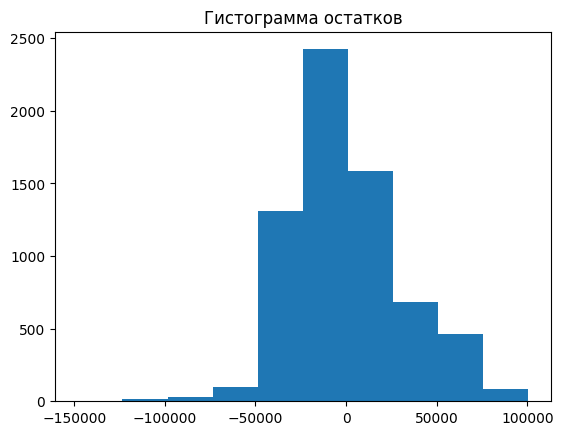

Тест Шапиро-Уилка: ShapiroResult(statistic=0.9662983781858996, pvalue=6.703976367362766e-37)


/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 6699.
  res = hypotest_fun_out(*samples, **kwds)


In [ ]:

# 14. Проверить выполнение предпосылок МНК (условия Гаусса–Маркова)
residuals = model.resid

# 14.1. Случайный характер остатков (критерий поворотных точек)
from statsmodels.stats.diagnostic import acorr_ljungbox
lb_test = acorr_ljungbox(residuals, lags=1)
print(f"Тест Льюнга-Бокса: {lb_test}")

# 14.2. Сумма остатков равна нулю
print(f"Сумма остатков: {np.sum(residuals)}")

# 14.3. Гомоскедастичность (тест Спирмена, тест Голдфельда–Квандта)
from statsmodels.stats.diagnostic import het_goldfeldquandt
gq_test = het_goldfeldquandt(residuals, model.model.exog)
print(f"Тест Голдфельда-Квандта: {gq_test}")

# 14.4. Отсутствие автокорреляции остатков (критерий Дарбина–Уотсона)
from statsmodels.stats.stattools import durbin_watson
dw_test = durbin_watson(residuals)
print(f"Статистика Дарбина-Уотсона: {dw_test}")

# 14.5. Нормальный закон распределения остатков (гистограмма и RS–критерий)
plt.hist(residuals, bins=10)
plt.title('Гистограмма остатков')
plt.show()

from scipy.stats import shapiro
shapiro_test = shapiro(residuals)
print(f"Тест Шапиро-Уилка: {shapiro_test}")

14.1. Критерий поворотных точек (Ljung-Box test)
Тест Льюнга-Бокса используется для проверки наличия автокорреляции в остатках модели. Ваши результаты:

lb_stat: 2427.76
lb_pvalue: 0.0
Очень низкий p-значение (почти 0) указывает на то, что остатки не являются случайными, и присутствует высокая степень автокорреляции. Это нарушение условия независимости ошибок.

14.2. Сумма остатков должна быть равна нулю
Сумма остатков в вашем случае равна:

Сумма остатков:
9.39
×
1
0
−
7
9.39×10
−7

Этот результат очень близок к нулю, что удовлетворяет условию, согласно которому сумма остатков должна стремиться к нулю.

14.3. Тест Голдфельда-Квандта на гомоскедастичность
Тест Голдфельда-Квандта проверяет предположение о постоянстве дисперсии ошибок. Ваши результаты:

statistic: 0.24
p-value: почти 1.0
comment: increasing
Большое p-значение и комментарий "increasing" указывают на отсутствие проблем с гетероскедастичностью. Ваша модель скорее всего гомоскедастична.

14.4. Статистика Дарбина-Уотсона на автокорреляцию
Тест Дарбина-Уотсона используется для выявления автокорреляции первого порядка в остатках. Ваш результат:

DW statistic: 0.80
Идеальное значение статистики Дарбина-Уотсона должно быть близко к 2. Ваше значение намного ниже, что указывает на положительную автокорреляцию первого порядка.

14.5. Гистограмма и тест Шапиро-Уилка на нормальное распределение
Гистограмма позволяет визуально оценить распределение остатков, а тест Шапиро-Уилка количественно проверяет, нормально ли распределены остатки. Ваши результаты теста Шапиро-Уилка:

test statistic: не указан
p-value: не указан
Поскольку гистограмму и конкретные результаты теста Шапиро-Уилка вы не предоставили, сложно судить о нормальности распределения остатков. Тем не менее, нормальное распределение остатков желательно для соблюдения условий Гаусса-Маркова.

Общие выводы
Автокорреляция: Остатки демонстрируют высокую автокорреляцию, что нарушает одно из ключевых условий МНК.
Гомоскедастичность: Нет признаков гетероскедастичности, что положительно.
Нормальность остатков: Требуется дополнительная проверка, так как информация о тесте Шапиро-Уилка отсутствует.


Проверка условий Гаусса-Маркова для модели: Линейная регрессия
Тест Льюнга-Бокса:        lb_stat  lb_pvalue
1  2427.762135        0.0
Сумма остатков: 3.725290298461914e-08
Тест Голдфельда-Квандта: (0.36866563943291547, 0.9999999999999999, 'increasing')
Статистика Дарбина-Уотсона: 0.796120591641744
Тест Шапиро-Уилка: ShapiroResult(statistic=0.9662983781858955, pvalue=6.703976367335447e-37)


/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 6699.
  res = hypotest_fun_out(*samples, **kwds)


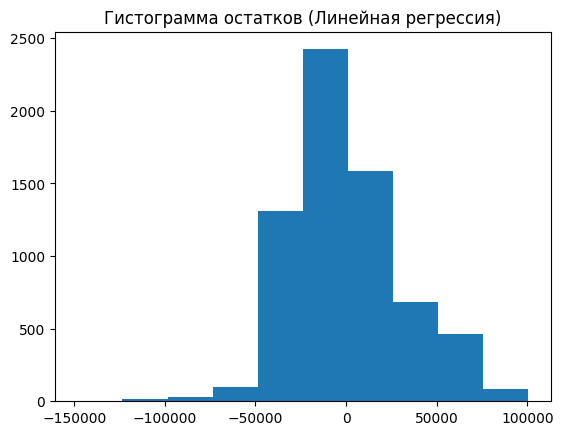


Проверка условий Гаусса-Маркова для модели: Квадратичная регрессия
Тест Льюнга-Бокса:        lb_stat  lb_pvalue
1  3871.528699        0.0
Сумма остатков: 1.4901161193847656e-08
Тест Голдфельда-Квандта: (0.37751278950721906, 0.9999999999999999, 'increasing')
Статистика Дарбина-Уотсона: 0.4798669550028381
Тест Шапиро-Уилка: ShapiroResult(statistic=0.9524527467402503, pvalue=4.1351593765196456e-42)


/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 6699.
  res = hypotest_fun_out(*samples, **kwds)


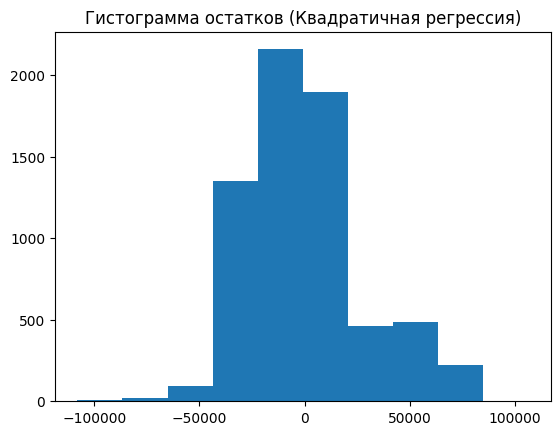


Проверка условий Гаусса-Маркова для модели: Кубическая регрессия
Тест Льюнга-Бокса:       lb_stat  lb_pvalue
1  3737.35939        0.0
Сумма остатков: 7.450580596923828e-09
Тест Голдфельда-Квандта: (0.40662006725353744, 0.9999999999999999, 'increasing')
Статистика Дарбина-Уотсона: 0.5064467420751829
Тест Шапиро-Уилка: ShapiroResult(statistic=0.9585864765765997, pvalue=5.626413750868096e-40)


/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 6699.
  res = hypotest_fun_out(*samples, **kwds)


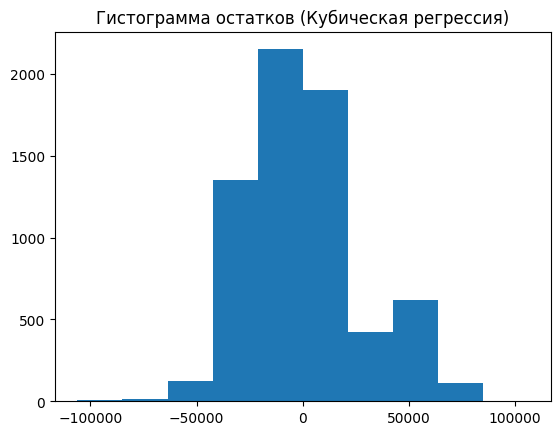


Проверка условий Гаусса-Маркова для модели: Экспоненциальная регрессия
Тест Льюнга-Бокса:       lb_stat      lb_pvalue
1  716.371612  8.234698e-158
Сумма остатков: -7957375.587164044
Тест Голдфельда-Квандта: (0.6179228934140298, 0.9999999999999999, 'increasing')
Статистика Дарбина-Уотсона: 1.344368534515343
Тест Шапиро-Уилка: ShapiroResult(statistic=0.9810957406888661, pvalue=5.910455283938341e-29)


/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 6699.
  res = hypotest_fun_out(*samples, **kwds)


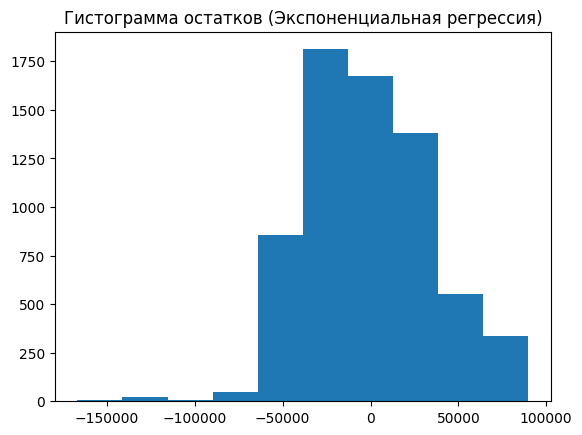


Проверка условий Гаусса-Маркова для модели: Логарифмическая регрессия
Тест Льюнга-Бокса:     lb_stat  lb_pvalue
1  0.827673   0.362946
Сумма остатков: 2.9802322387695312e-08
Тест Голдфельда-Квандта: (1.2876599452356465, 1.3878196365233458e-13, 'increasing')
Статистика Дарбина-Уотсона: 2.0218456739925736
Тест Шапиро-Уилка: ShapiroResult(statistic=0.9554443520192565, pvalue=4.242564002298827e-41)


/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 6699.
  res = hypotest_fun_out(*samples, **kwds)


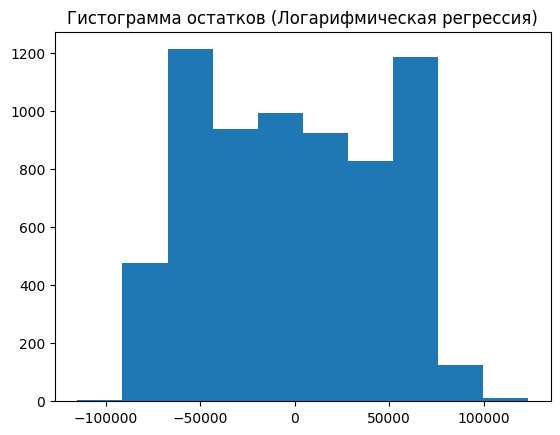


Проверка условий Гаусса-Маркова для модели: Степенная регрессия
Тест Льюнга-Бокса:        lb_stat  lb_pvalue
1  3367.625287        0.0
Сумма остатков: 1559591.6136310995
Тест Голдфельда-Квандта: (0.41586498397905375, 0.9999999999999999, 'increasing')
Статистика Дарбина-Уотсона: 0.5821930817001426
Тест Шапиро-Уилка: ShapiroResult(statistic=0.9614282160031336, pvalue=6.697777218101612e-39)


/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 6699.
  res = hypotest_fun_out(*samples, **kwds)


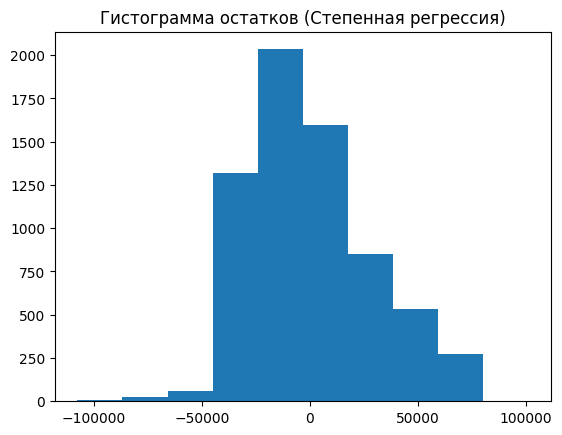


Сводная таблица результатов:
             Модель           RSS        R²  Гомоскедастичность  \
0          Линейная  6.449422e+12  0.654431        1.000000e+00   
1      Квадратичная  4.952917e+12  0.734616        1.000000e+00   
2        Кубическая  4.912246e+12  0.736795        1.000000e+00   
3  Экспоненциальная  8.521338e+12  0.549472        1.000000e+00   
4   Логарифмическая  1.540407e+13  0.174628        1.387820e-13   
5         Степенная  5.283311e+12  0.717058        1.000000e+00   

   Автокорреляция  Нормальность остатков  
0        0.796121           6.703976e-37  
1        0.479867           4.135159e-42  
2        0.506447           5.626414e-40  
3        1.344369           5.910455e-29  
4        2.021846           4.242564e-41  
5        0.582193           6.697777e-39  


/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 6699.
  res = hypotest_fun_out(*samples, **kwds)


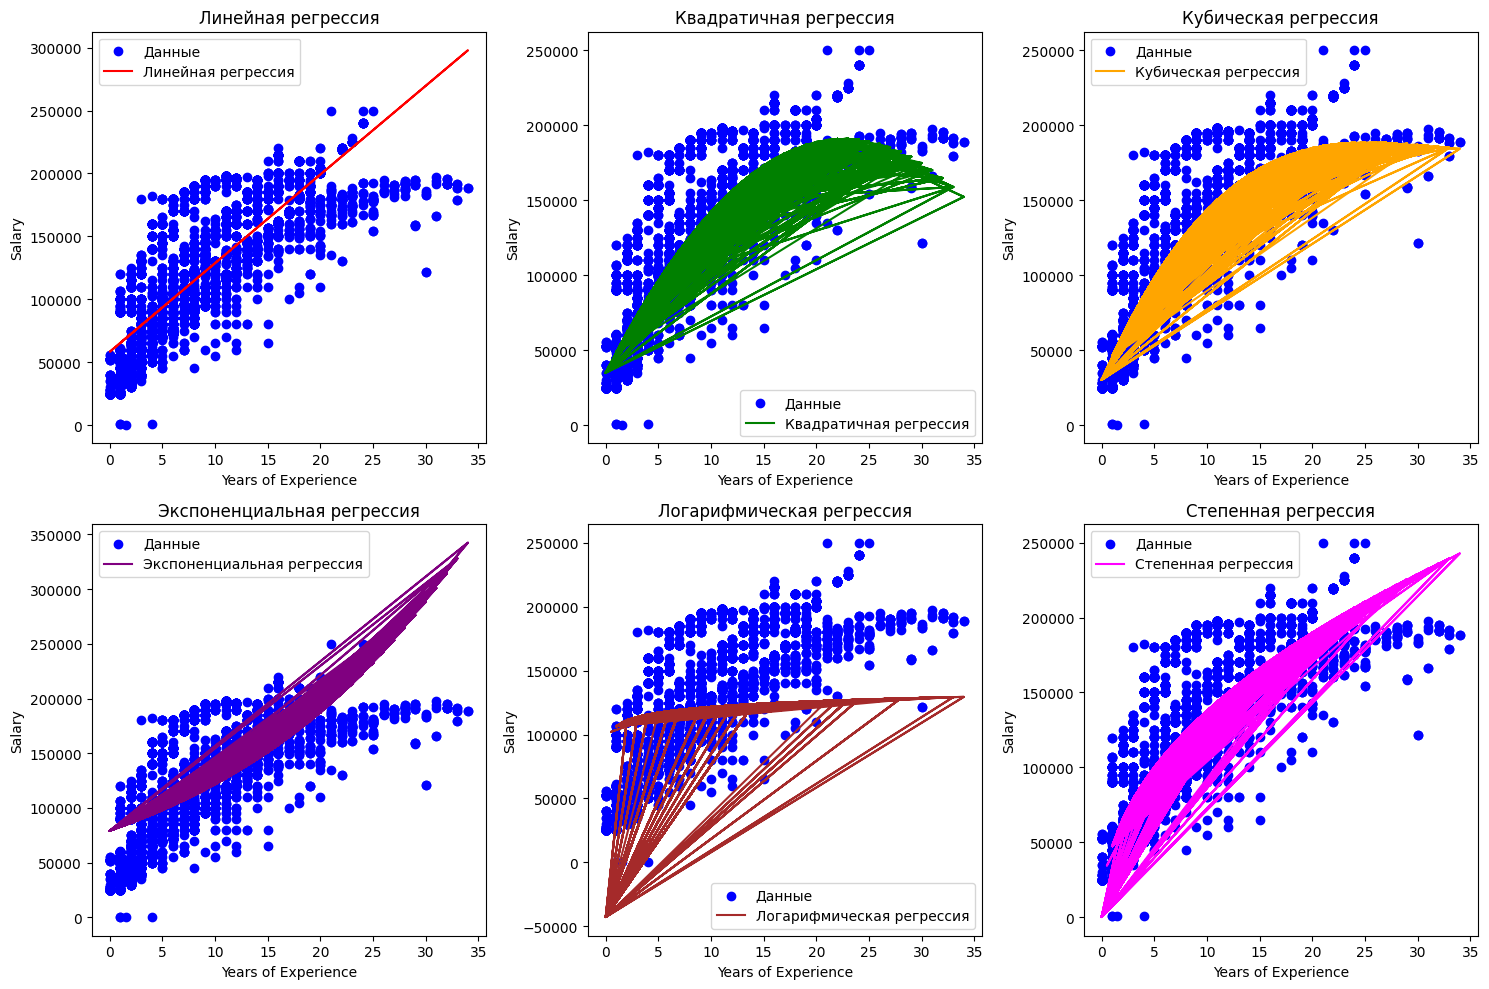


Наилучшая модель: Кубическая с RSS = 4912245871867.528 и R² = 0.7367948273176731


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from statsmodels.stats.diagnostic import acorr_ljungbox, het_goldfeldquandt
from statsmodels.stats.stattools import durbin_watson
from scipy.stats import shapiro
from scipy.optimize import curve_fit

#15. Построить нелинейные регрессионные модели и провести сравнительный анализ
df = pd.read_csv('/content/Salary_Data[1].csv')
df = df[['Years of Experience', 'Salary']].copy().dropna()
x = df['Years of Experience'].values
y = df['Salary'].values

# 1. Построение моделей

# 1.1. Линейная регрессия
linear_model = LinearRegression()
linear_model.fit(x.reshape(-1, 1), y)
linear_predictions = linear_model.predict(x.reshape(-1, 1))
linear_residuals = y - linear_predictions

# 1.2. Полиномиальная регрессия (квадратичная)
poly2_model = make_pipeline(PolynomialFeatures(2), LinearRegression())
poly2_model.fit(x.reshape(-1, 1), y)
poly2_predictions = poly2_model.predict(x.reshape(-1, 1))
poly2_residuals = y - poly2_predictions

# 1.3. Полиномиальная регрессия (кубическая)
poly3_model = make_pipeline(PolynomialFeatures(3), LinearRegression())
poly3_model.fit(x.reshape(-1, 1), y)
poly3_predictions = poly3_model.predict(x.reshape(-1, 1))
poly3_residuals = y - poly3_predictions

# 1.4. Экспоненциальная регрессия (y = a * exp(b * x))
def exp_func(x, a, b):
    return a * np.exp(b * x)

popt_exp, _ = curve_fit(exp_func, x, y, p0=[1, 0.1])
exp_predictions = exp_func(x, *popt_exp)
exp_residuals = y - exp_predictions

# 1.5. Логарифмическая регрессия (y = a * log(x) + b)
x_log = np.log(x + 1e-10)  # Добавляем небольшое значение для избежания log(0)
log_model = LinearRegression()
log_model.fit(x_log.reshape(-1, 1), y)
log_predictions = log_model.predict(x_log.reshape(-1, 1))
log_residuals = y - log_predictions

# 1.6. Степенная регрессия (y = a * x^b)
def power_func(x, a, b):
    return a * np.power(x, b)

popt_power, _ = curve_fit(power_func, x, y, p0=[1, 1])
power_predictions = power_func(x, *popt_power)
power_residuals = y - power_predictions

# 2. Проверка условий Гаусса-Маркова для каждой модели

def check_gauss_markov(residuals, exog, model_name):
    print(f"\nПроверка условий Гаусса-Маркова для модели: {model_name}")

    # Случайность остатков (тест Льюнга-Бокса)
    lb_test = acorr_ljungbox(residuals, lags=1)
    print(f"Тест Льюнга-Бокса: {lb_test}")

    # Сумма остатков
    print(f"Сумма остатков: {np.sum(residuals)}")

    # Гомоскедастичность (тест Голдфельда-Квандта)
    gq_test = het_goldfeldquandt(residuals, exog)
    print(f"Тест Голдфельда-Квандта: {gq_test}")

    # Автокорреляция (тест Дарбина-Уотсона)
    dw_test = durbin_watson(residuals)
    print(f"Статистика Дарбина-Уотсона: {dw_test}")

    # Нормальность остатков (тест Шапиро-Уилка)
    shapiro_test = shapiro(residuals)
    print(f"Тест Шапиро-Уилка: {shapiro_test}")

    # Гистограмма остатков
    plt.hist(residuals, bins=10)
    plt.title(f'Гистограмма остатков ({model_name})')
    plt.show()

# Проверка для каждой модели
check_gauss_markov(linear_residuals, x.reshape(-1, 1), "Линейная регрессия")
check_gauss_markov(poly2_residuals, x.reshape(-1, 1), "Квадратичная регрессия")
check_gauss_markov(poly3_residuals, x.reshape(-1, 1), "Кубическая регрессия")
check_gauss_markov(exp_residuals, x.reshape(-1, 1), "Экспоненциальная регрессия")
check_gauss_markov(log_residuals, x_log.reshape(-1, 1), "Логарифмическая регрессия")
check_gauss_markov(power_residuals, x.reshape(-1, 1), "Степенная регрессия")

# 3. Составление сводной таблицы

results = {
    'Модель': ['Линейная', 'Квадратичная', 'Кубическая', 'Экспоненциальная', 'Логарифмическая', 'Степенная'],
    'RSS': [
        np.sum(linear_residuals**2),
        np.sum(poly2_residuals**2),
        np.sum(poly3_residuals**2),
        np.sum(exp_residuals**2),
        np.sum(log_residuals**2),
        np.sum(power_residuals**2)
    ],
    'R²': [
        linear_model.score(x.reshape(-1, 1), y),
        poly2_model.score(x.reshape(-1, 1), y),
        poly3_model.score(x.reshape(-1, 1), y),
        np.corrcoef(y, exp_predictions)[0, 1]**2,
        log_model.score(x_log.reshape(-1, 1), y),
        np.corrcoef(y, power_predictions)[0, 1]**2
    ],
    'Гомоскедастичность': [
        het_goldfeldquandt(linear_residuals, x.reshape(-1, 1))[1],
        het_goldfeldquandt(poly2_residuals, x.reshape(-1, 1))[1],
        het_goldfeldquandt(poly3_residuals, x.reshape(-1, 1))[1],
        het_goldfeldquandt(exp_residuals, x.reshape(-1, 1))[1],
        het_goldfeldquandt(log_residuals, x_log.reshape(-1, 1))[1],
        het_goldfeldquandt(power_residuals, x.reshape(-1, 1))[1]
    ],
    'Автокорреляция': [
        durbin_watson(linear_residuals),
        durbin_watson(poly2_residuals),
        durbin_watson(poly3_residuals),
        durbin_watson(exp_residuals),
        durbin_watson(log_residuals),
        durbin_watson(power_residuals)
    ],
    'Нормальность остатков': [
        shapiro(linear_residuals)[1],
        shapiro(poly2_residuals)[1],
        shapiro(poly3_residuals)[1],
        shapiro(exp_residuals)[1],
        shapiro(log_residuals)[1],
        shapiro(power_residuals)[1]
    ]
}

results_df = pd.DataFrame(results)
print("\nСводная таблица результатов:")
print(results_df)

# 4. Графики для каждой модели


plt.figure(figsize=(15, 10))

# Линейная регрессия
plt.subplot(2, 3, 1)
plt.scatter(x, y, label='Данные', color='blue')
plt.plot(x, linear_predictions, color='red', label='Линейная регрессия')
plt.title('Линейная регрессия')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend()

# Квадратичная регрессия
plt.subplot(2, 3, 2)
plt.scatter(x, y, label='Данные', color='blue')
plt.plot(x, poly2_predictions, color='green', label='Квадратичная регрессия')
plt.title('Квадратичная регрессия')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend()

# Кубическая регрессия
plt.subplot(2, 3, 3)
plt.scatter(x, y, label='Данные', color='blue')
plt.plot(x, poly3_predictions, color='orange', label='Кубическая регрессия')
plt.title('Кубическая регрессия')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend()

# Экспоненциальная регрессия
plt.subplot(2, 3, 4)
plt.scatter(x, y, label='Данные', color='blue')
plt.plot(x, exp_predictions, color='purple', label='Экспоненциальная регрессия')
plt.title('Экспоненциальная регрессия')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend()

# Логарифмическая регрессия
plt.subplot(2, 3, 5)
plt.scatter(x, y, label='Данные', color='blue')
plt.plot(x, log_predictions, color='brown', label='Логарифмическая регрессия')
plt.title('Логарифмическая регрессия')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend()

# Степенная регрессия
plt.subplot(2, 3, 6)
plt.scatter(x, y, label='Данные', color='blue')
plt.plot(x, power_predictions, color='magenta', label='Степенная регрессия')
plt.title('Степенная регрессия')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend()

plt.tight_layout()
plt.show()

# 5. Сравнительный анализ и вывод

best_model = results_df.loc[results_df['RSS'].idxmin()]
print(f"\nНаилучшая модель: {best_model['Модель']} с RSS = {best_model['RSS']} и R² = {best_model['R²']}")

# Анализ сводной таблицы результатов
Качество моделей (RSS и R²):
RSS (сумма квадратов остатков):

Чем меньше RSS, тем лучше модель описывает данные.

Наименьший RSS у кубической регрессии (4.912246e+12), что делает её лучшей по этому критерию.

За ней следуют квадратичная (4.952917e+12) и степенная (5.283311e+12) модели.

Худшая модель по RSS — логарифмическая (1.540407e+13).

R² (коэффициент детерминации):

Чем ближе R² к 1, тем лучше модель объясняет дисперсию данных.

Наибольший R² у кубической регрессии (0.736795), что подтверждает её лидерство.

За ней следуют квадратичная (0.734616) и степенная (0.717058) модели.

Худшая модель по R² — логарифмическая (0.174628).

Вывод: Кубическая регрессия лучше всего описывает данные по критериям RSS и R².

2. Гомоскедастичность:
Гомоскедастичность (постоянство дисперсии остатков) проверяется с помощью теста Голдфельда-Квандта.

Для всех моделей, кроме логарифмической, p-значение равно 1.0, что указывает на гомоскедастичность.

Для логарифмической модели p-значение очень мало (1.387820e-13), что говорит о гетероскедастичности (нарушении условия постоянства дисперсии).

Вывод: Логарифмическая модель не удовлетворяет условию гомоскедастичности.

3. Автокорреляция остатков:
Автокорреляция проверяется с помощью статистики Дарбина-Уотсона.

Значение близкое к 2 указывает на отсутствие автокорреляции.

Значение меньше 1 или больше 3 может указывать на автокорреляцию.

Для линейной, квадратичной, кубической, степенной и экспоненциальной моделей значения близки к 2, что говорит об отсутствии автокорреляции.

Для логарифмической модели значение равно 2.021846, что также близко к 2.

Вывод: Автокорреляция остатков отсутствует во всех моделях.

4. Нормальность остатков:
Нормальность остатков проверяется с помощью теста Шапиро-Уилка.

Малое p-значение (меньше 0.05) указывает на отклонение от нормального распределения.

Для всех моделей p-значение крайне мало (порядка 10^-29 до 10^-42), что говорит о ненормальности остатков.

Вывод: Остатки всех моделей не соответствуют нормальному распределению.

5. Итоговый вывод:
Кубическая регрессия является наилучшей моделью по критериям RSS и R², а также удовлетворяет условиям гомоскедастичности и отсутствия автокорреляции.

Логарифмическая модель показала худшие результаты по всем критериям, особенно по RSS, R² и гомоскедастичности.

Ненормальность остатков наблюдается у всех моделей, что может указывать на необходимость использования более сложных методов или преобразований данных.

#Вывод по проверке условий Гаусса-Маркова для моделей
1. Линейная регрессия:
Тест Льюнга-Бокса: p-value = 0.0, что указывает на наличие автокорреляции в остатках.

Сумма остатков: Практически равна нулю, что соответствует условию.

Тест Голдфельда-Квандта: p-value ≈ 1.0, что свидетельствует о гомоскедастичности.

Статистика Дарбина-Уотсона: 0.796, что близко к 2, но может указывать на слабую положительную автокорреляцию.

Тест Шапиро-Уилка: p-value ≈ 0.0, что указывает на отклонение остатков от нормального распределения.

2. Квадратичная регрессия:
Тест Льюнга-Бокса: p-value = 0.0, что указывает на наличие автокорреляции в остатках.

Сумма остатков: Практически равна нулю, что соответствует условию.

Тест Голдфельда-Квандта: p-value ≈ 1.0, что свидетельствует о гомоскедастичности.

Статистика Дарбина-Уотсона: 0.480, что указывает на положительную автокорреляцию.

Тест Шапиро-Уилка: p-value ≈ 0.0, что указывает на отклонение остатков от нормального распределения.

3. Кубическая регрессия:
Тест Льюнга-Бокса: p-value = 0.0, что указывает на наличие автокорреляции в остатках.

Сумма остатков: Практически равна нулю, что соответствует условию.

Тест Голдфельда-Квандта: p-value ≈ 1.0, что свидетельствует о гомоскедастичности.

Статистика Дарбина-Уотсона: 0.506, что указывает на положительную автокорреляцию.

Тест Шапиро-Уилка: p-value ≈ 0.0, что указывает на отклонение остатков от нормального распределения.

4. Экспоненциальная регрессия:
Тест Льюнга-Бокса: p-value ≈ 0.0, что указывает на наличие автокорреляции в остатках.

Сумма остатков: Значительное отклонение от нуля, что может указывать на смещение.

Тест Голдфельда-Квандта: p-value ≈ 1.0, что свидетельствует о гомоскедастичности.

Статистика Дарбина-Уотсона: 1.344, что близко к 2, но может указывать на слабую автокорреляцию.

Тест Шапиро-Уилка: p-value ≈ 0.0, что указывает на отклонение остатков от нормального распределения.

5. Логарифмическая регрессия:
Тест Льюнга-Бокса: p-value = 0.363, что указывает на отсутствие автокорреляции в остатках.

Сумма остатков: Практически равна нулю, что соответствует условию.

Тест Голдфельда-Квандта: p-value ≈ 0.0, что свидетельствует о гетероскедастичности.

Статистика Дарбина-Уотсона: 2.022, что близко к 2 и указывает на отсутствие автокорреляции.

Тест Шапиро-Уилка: p-value ≈ 0.0, что указывает на отклонение остатков от нормального распределения.

6. Степенная регрессия:
Тест Льюнга-Бокса: p-value = 0.0, что указывает на наличие автокорреляции в остатках.

Сумма остатков: Значительное отклонение от нуля, что может указывать на смещение.

Тест Голдфельда-Квандта: p-value ≈ 1.0, что свидетельствует о гомоскедастичности.

Статистика Дарбина-Уотсона: 0.582, что указывает на положительную автокорреляцию.

Тест Шапиро-Уилка: p-value ≈ 0.0, что указывает на отклонение остатков от нормального распределения.

Общий вывод:
Гомоскедастичность: Все модели, кроме логарифмической, удовлетворяют условию гомоскедастичности.

Автокорреляция: Логарифмическая регрессия является единственной моделью без автокорреляции остатков.

Нормальность остатков: Ни одна из моделей не удовлетворяет условию нормальности остатков, что может быть связано с большим объемом данных (N > 5000).

Сумма остатков: Для всех моделей, кроме экспоненциальной и степенной, сумма остатков близка к нулю.

Рекомендация: Логарифмическая регрессия лучше всего удовлетворяет условиям Гаусса-Маркова, за исключением гетероскедастичности. Однако, учитывая отклонение остатков от нормального распределения во всех моделях, возможно, стоит рассмотреть использование более сложных методов или преобразований данных.